In [2]:
from pandas import read_csv, to_datetime
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

data = read_csv('data/MCI_2016.csv')
data['occurrencedate'] = to_datetime(data['occurrencedate'])

## Filter values for 2016 only

In [3]:
year_2016 = data[data.occurrencedate.dt.year == 2016]

## Drop duplicated event_unique_id

In [4]:
year2016 = year_2016.event_unique_id.drop_duplicates

## Analysis premise type

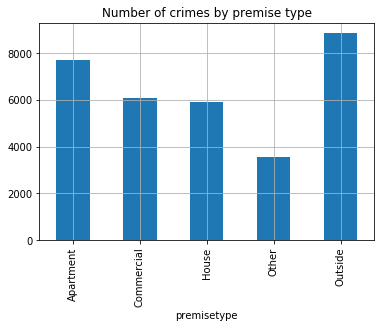

In [81]:
premisetype = year_2016.groupby("premisetype").size()
premisetype.plot(kind='bar', x=premisetype, grid=True, title='Number of crimes by premise type')
plt.show()

## Analysis occurrence date

/Users/gostendorf/.virtualenvs/finance/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gostendorf/.virtualenvs/finance/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: 'justdate' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


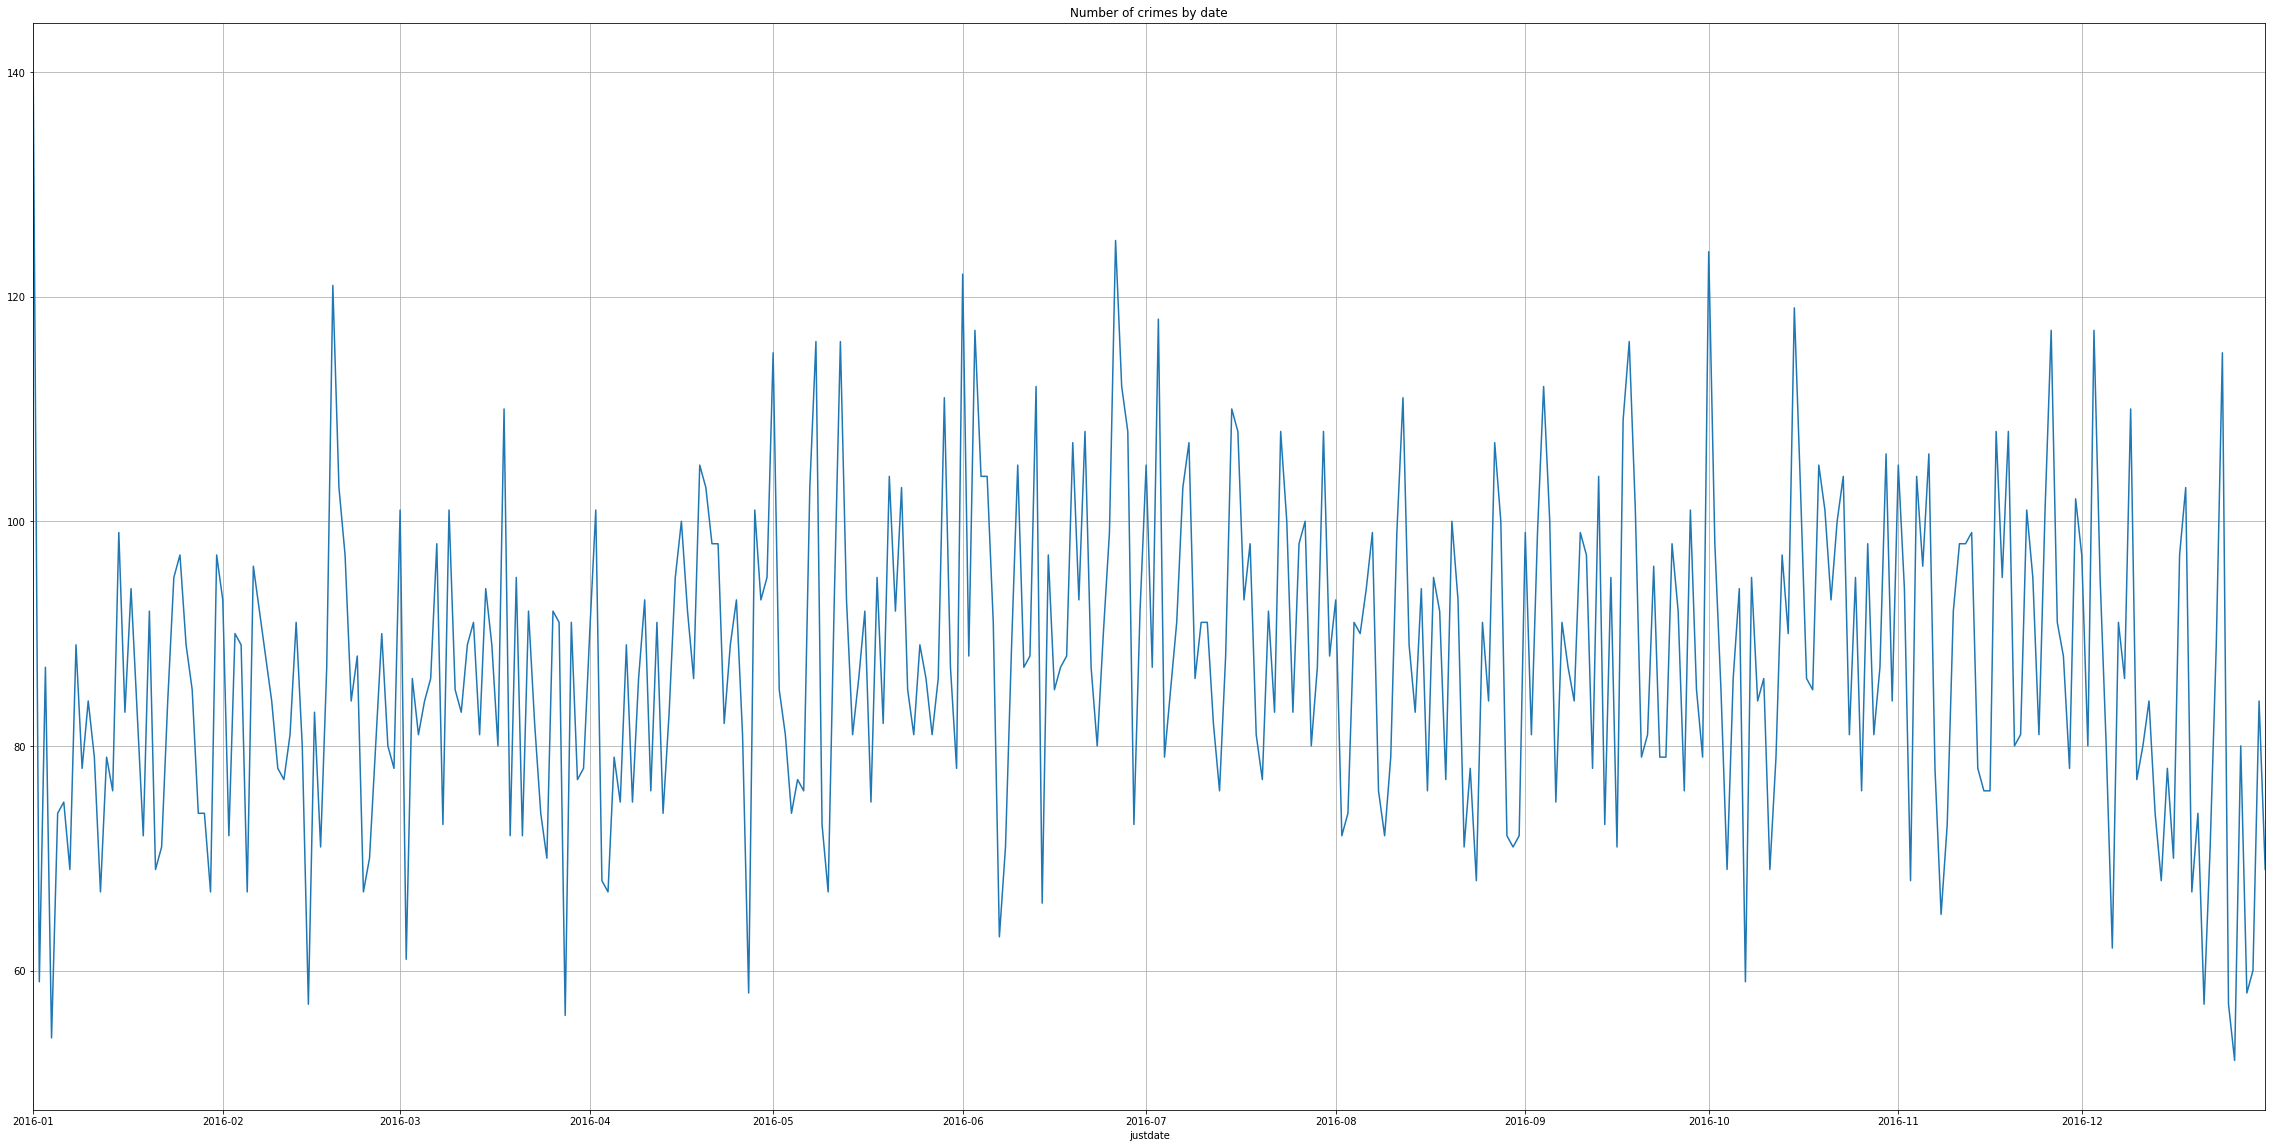

In [83]:
data['occurrencedate'] = to_datetime(data['occurrencedate'])
year_2016['justdate'] = year_2016['occurrencedate'].dt.date
#year_2016.index = year_2016['justdate']
#year_2016
group_by_date = year_2016.groupby('justdate').size()
group_by_date.plot(grid=True, x=year_2016.justdate, title='Number of crimes by date', figsize = (40,20))
plt.show()



## Date and premise type

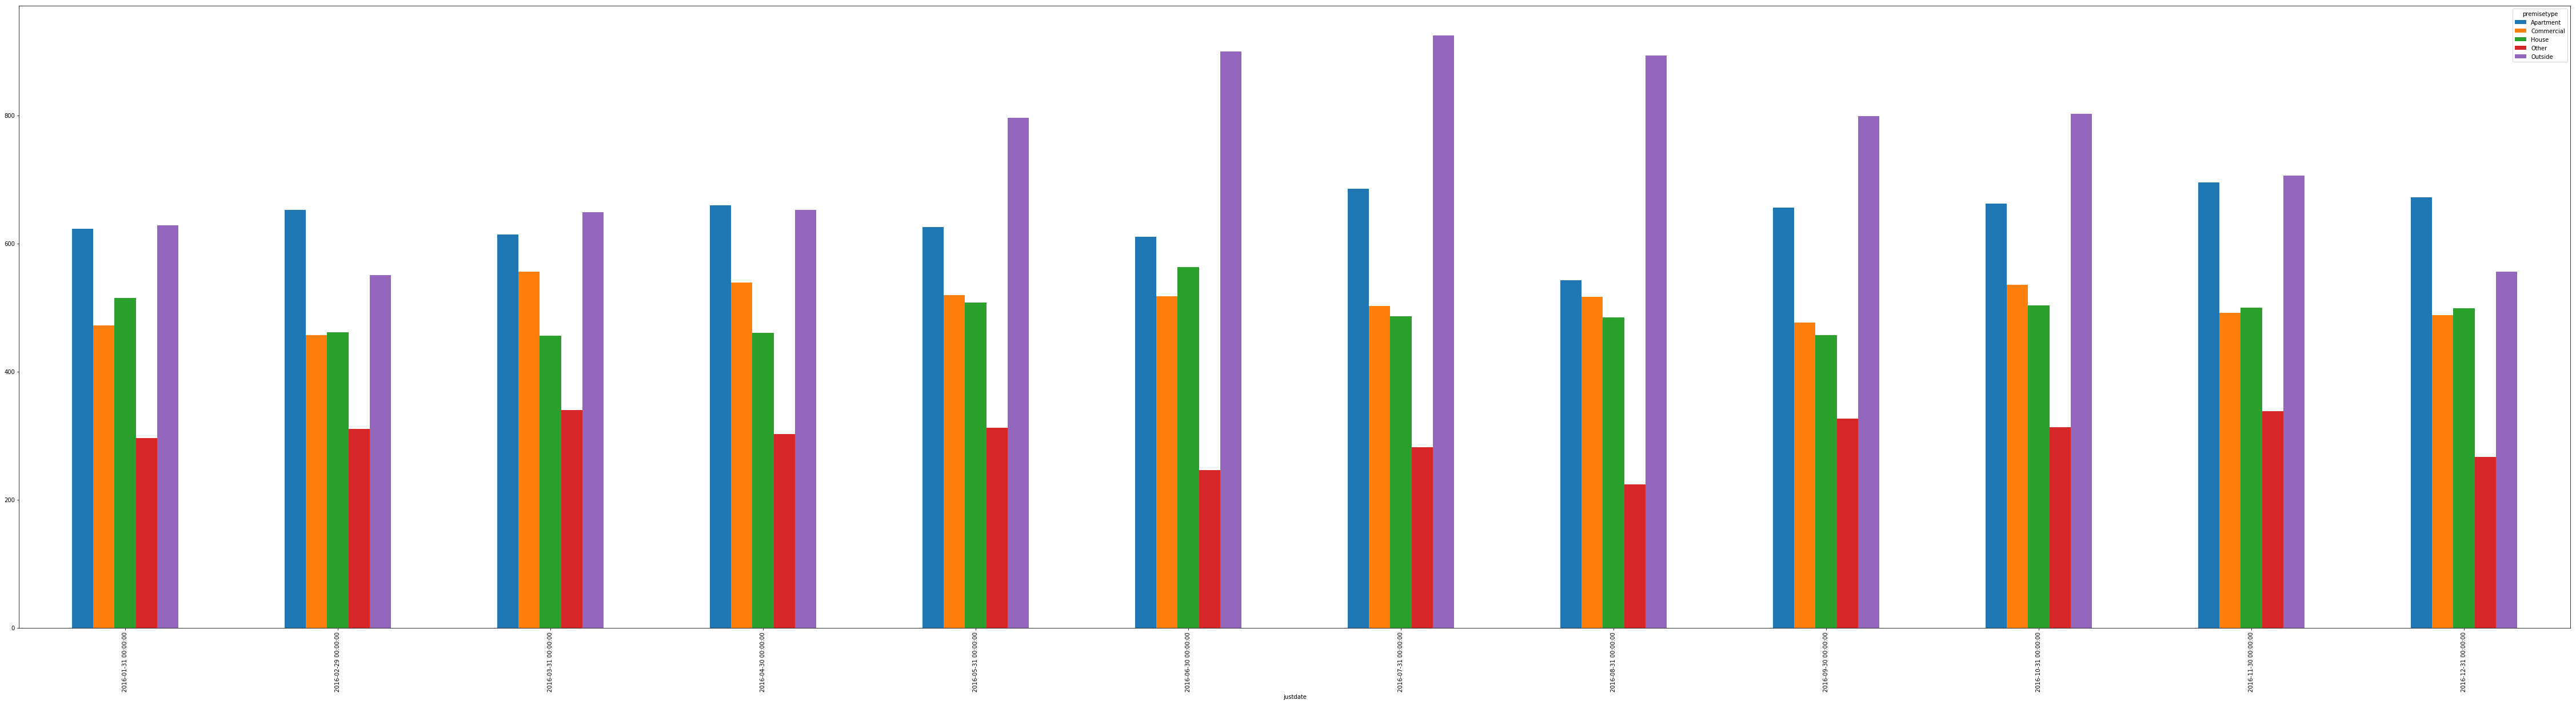

In [22]:
date_premise = year_2016[['justdate', 'premisetype']]
grouped_data = date_premise.sort_values('justdate').groupby(['justdate', 'premisetype']).agg('size')

grouped_data_unstacked = grouped_data.unstack()

grouped_data_unstacked.index = pd.to_datetime(grouped_data_unstacked.index)

grouped_data_unstacked

grouped_data_unstacked.index
resampled_monthly = grouped_data_unstacked.resample('M').sum()
resampled_monthly.plot(kind='bar', figsize=(80,20))
plt.show()

## Total number of crimes per month

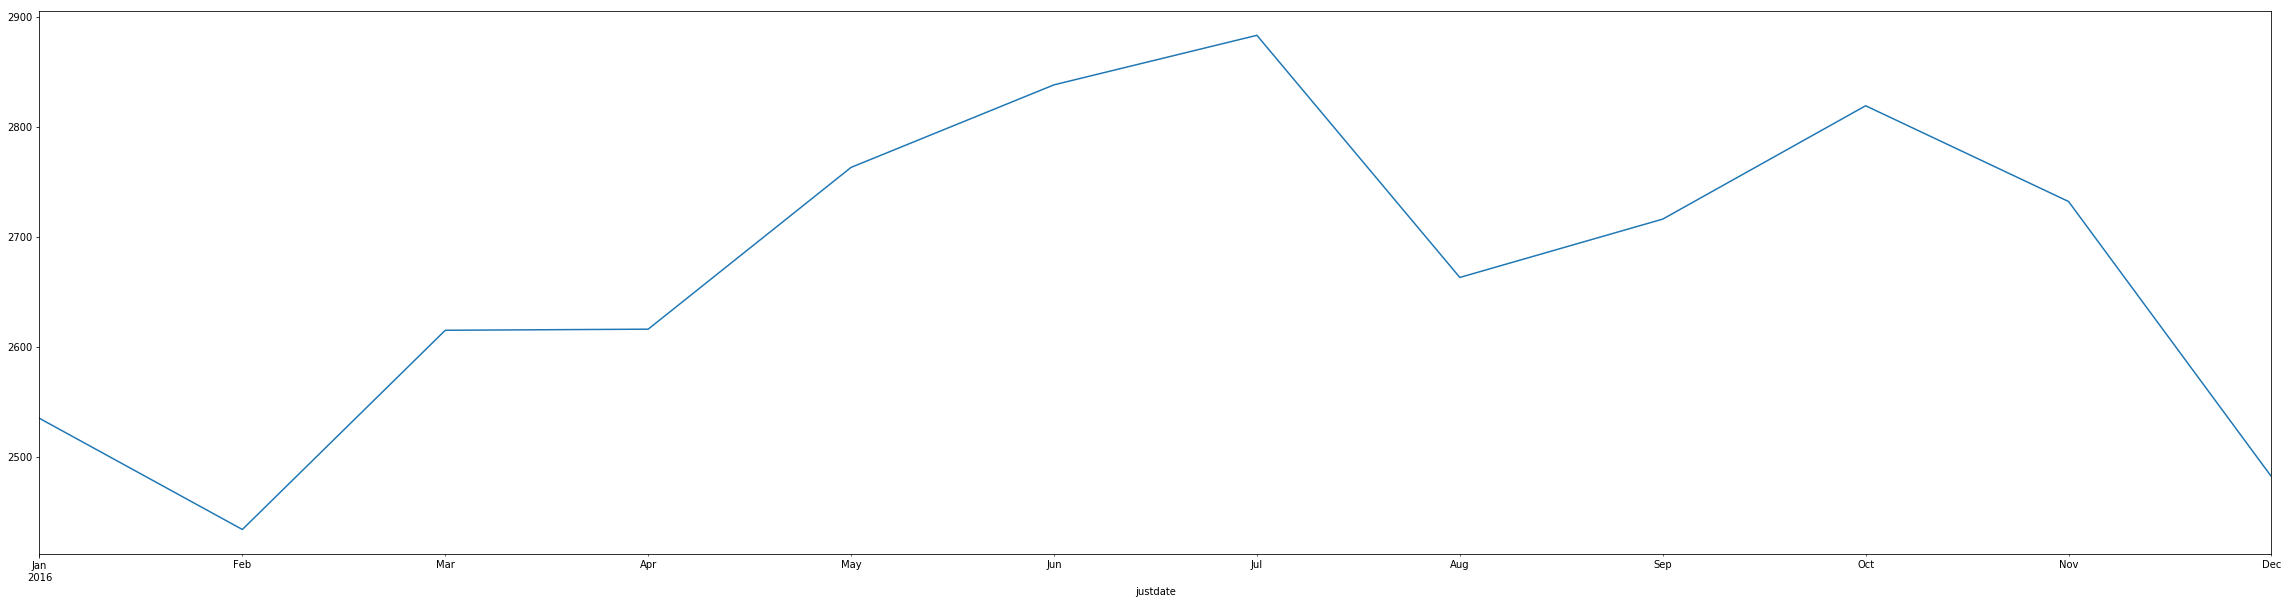

In [21]:
daily_number = year_2016.groupby("justdate").size()
daily_number.index = pd.to_datetime(daily_number.index)
monthly_number = daily_number.resample('M').sum()
monthly_number.plot(figsize=(40,10))
plt.show()

## Number per month and per premise type

In [29]:
daily_premise = year_2016.groupby(['justdate', 'premisetype']).agg('size')
daily_premise = daily_premise.unstack()
daily_premise.index = pd.to_datetime(daily_premise.index)
monthly_premise = daily_premise.resample('M').sum()
monthly_premise

premisetype,Apartment,Commercial,House,Other,Outside
justdate,,,,,
2016-01-31,623.0,472.0,515.0,296.0,629.0
2016-02-29,653.0,457.0,462.0,311.0,551.0
2016-03-31,614.0,556.0,456.0,340.0,649.0
2016-04-30,660.0,539.0,461.0,303.0,653.0
2016-05-31,626.0,520.0,508.0,312.0,797.0
2016-06-30,611.0,518.0,563.0,246.0,900.0
2016-07-31,686.0,503.0,487.0,282.0,925.0
2016-08-31,543.0,517.0,485.0,224.0,894.0
2016-09-30,656.0,477.0,457.0,327.0,799.0


## Number per weekday

In [30]:
weekday_crime = year_2016.groupby('occurrencedayofweek').size()
weekday_crime

occurrencedayofweek
Friday        4941
Monday        4414
Saturday      5026
Sunday        4734
Thursday      4493
Tuesday       4194
Wednesday     4294
dtype: int64

## Number per MCI

In [31]:
mcis = year_2016.groupby('MCI').size()
mcis

MCI
Assault            18016
Auto Theft          3245
Break and Enter     6309
Robbery             3583
Theft Over           943
dtype: int64

## Number per MCI per month

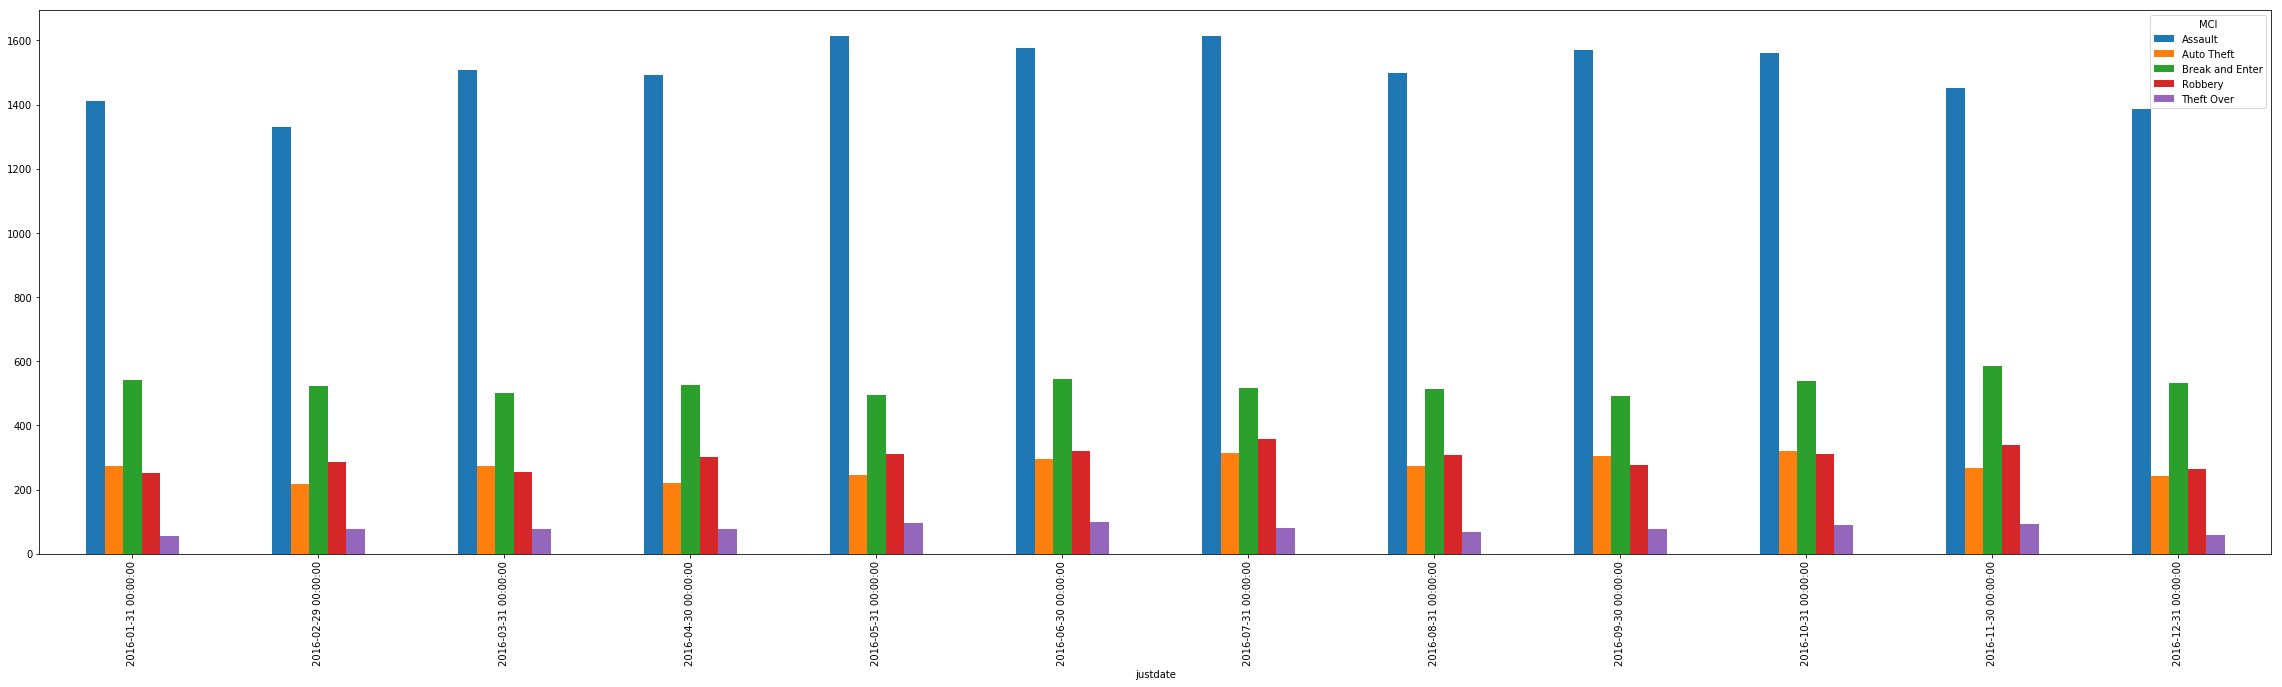

In [47]:
day_mci = year_2016.groupby(['justdate', 'MCI']).size()
day_mci = day_mci.unstack() 
day_mci.index = pd.to_datetime(day_mci.index)
month_mci = day_mci.resample('M').sum()
month_mci.plot(kind='bar', figsize=(40,10))
plt.show()

## Offence types

In [86]:
assaults_only = year_2016[year_2016['MCI'] == 'Assault']
assaults_only.index = pd.to_datetime(assaults_only.index)
offence_type = assaults_only.groupby('offence').size()
offence_type

offence
Administering Noxious Thing          54
Aggravated Aslt Peace Officer         1
Aggravated Assault                  335
Aggravated Assault Avails Pros        3
Air Gun Or Pistol: Bodily Harm        7
Assault                           12172
Assault - Force/Thrt/Impede          46
Assault - Resist/ Prevent Seiz      416
Assault Bodily Harm                 868
Assault Peace Officer               523
Assault Peace Officer Wpn/Cbh        50
Assault With Weapon                2965
Crim Negligence Bodily Harm          15
Disarming Peace/Public Officer        6
Discharge Firearm - Recklessly      151
Discharge Firearm With Intent       265
Pointing A Firearm                  117
Traps Likely Cause Bodily Harm        1
Unlawfully Causing Bodily Harm        2
Use Firearm / Immit Commit Off       19
dtype: int64

## Assault per month

/Users/gostendorf/.virtualenvs/finance/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'justdate' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  


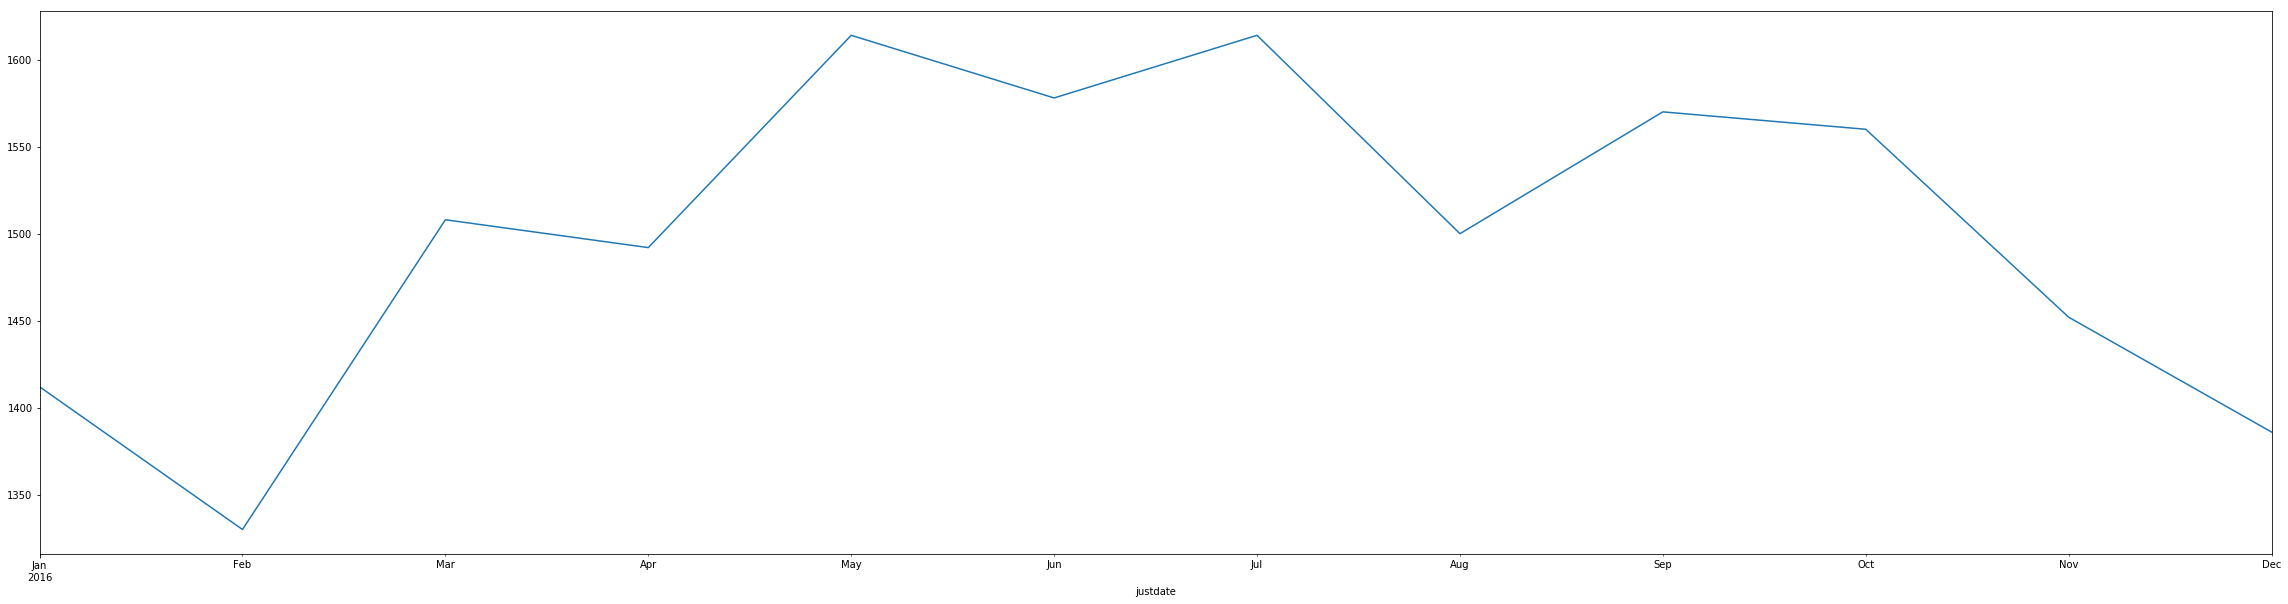

In [105]:
assaults_only
month_assaults = assaults_only.groupby('justdate').size()
month_assaults.reset_index()
month_assaults.index = pd.to_datetime(month_assaults.index)

month_assaults = month_assaults.resample('M').sum()
month_assaults
month_assaults.plot(figsize=(40,10))
plt.show()

## Number per MCI per premise type

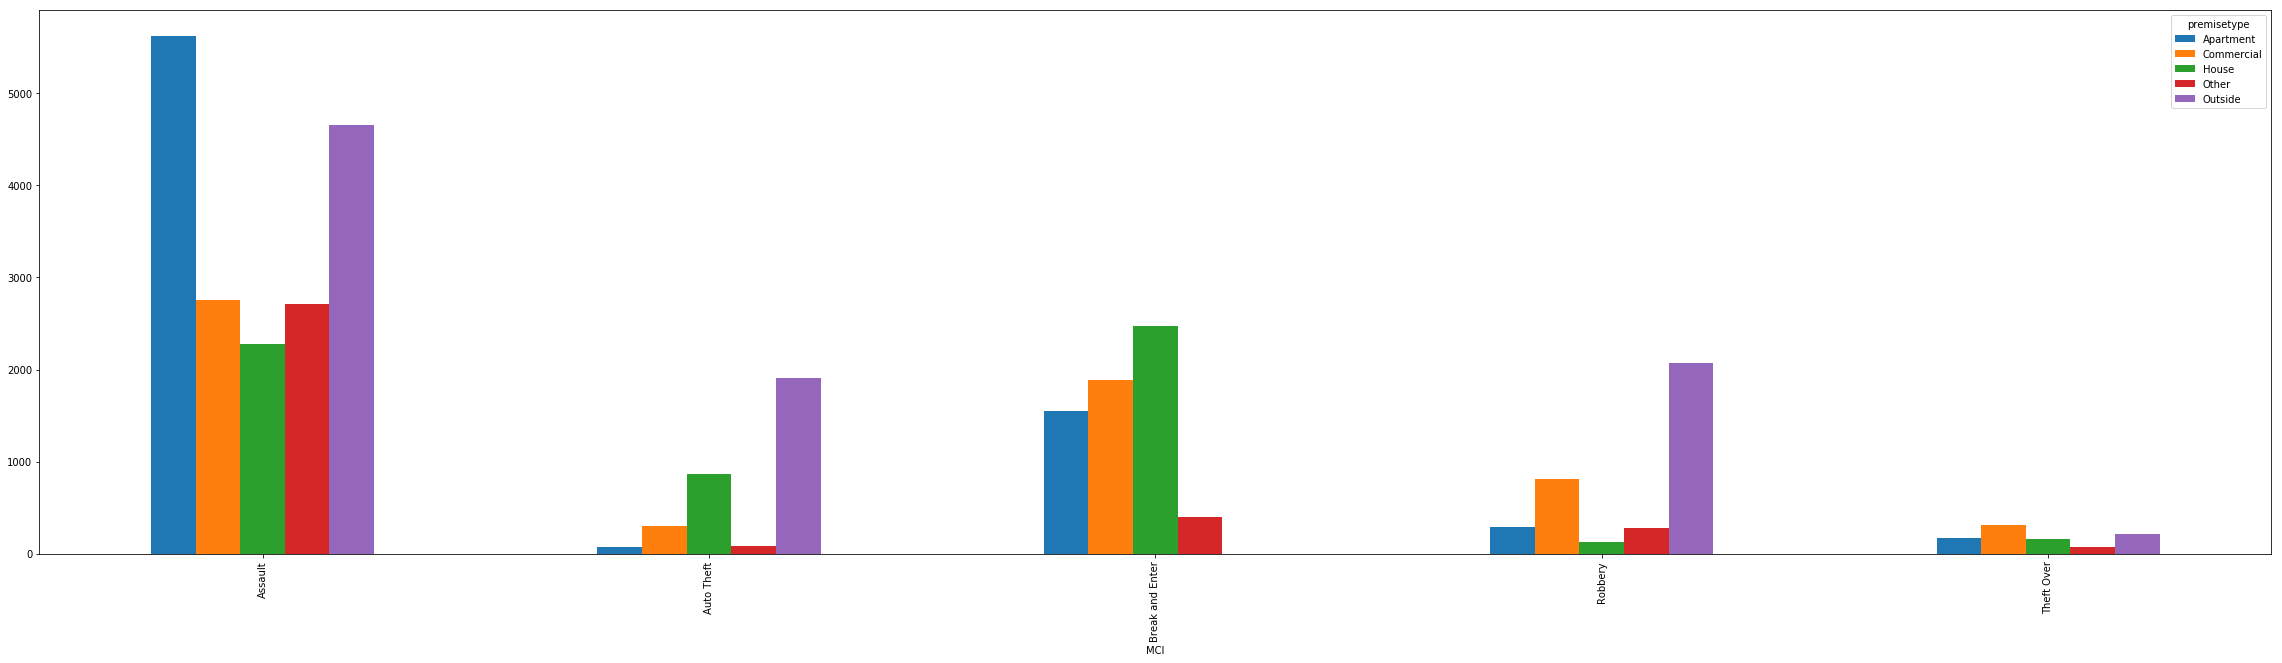

In [112]:
mci_premise = year_2016.groupby(['MCI', 'premisetype']).size()
mci_premise.unstack().plot(kind='bar', figsize=(40,10))
plt.show()

## Crimes per neighbourhood

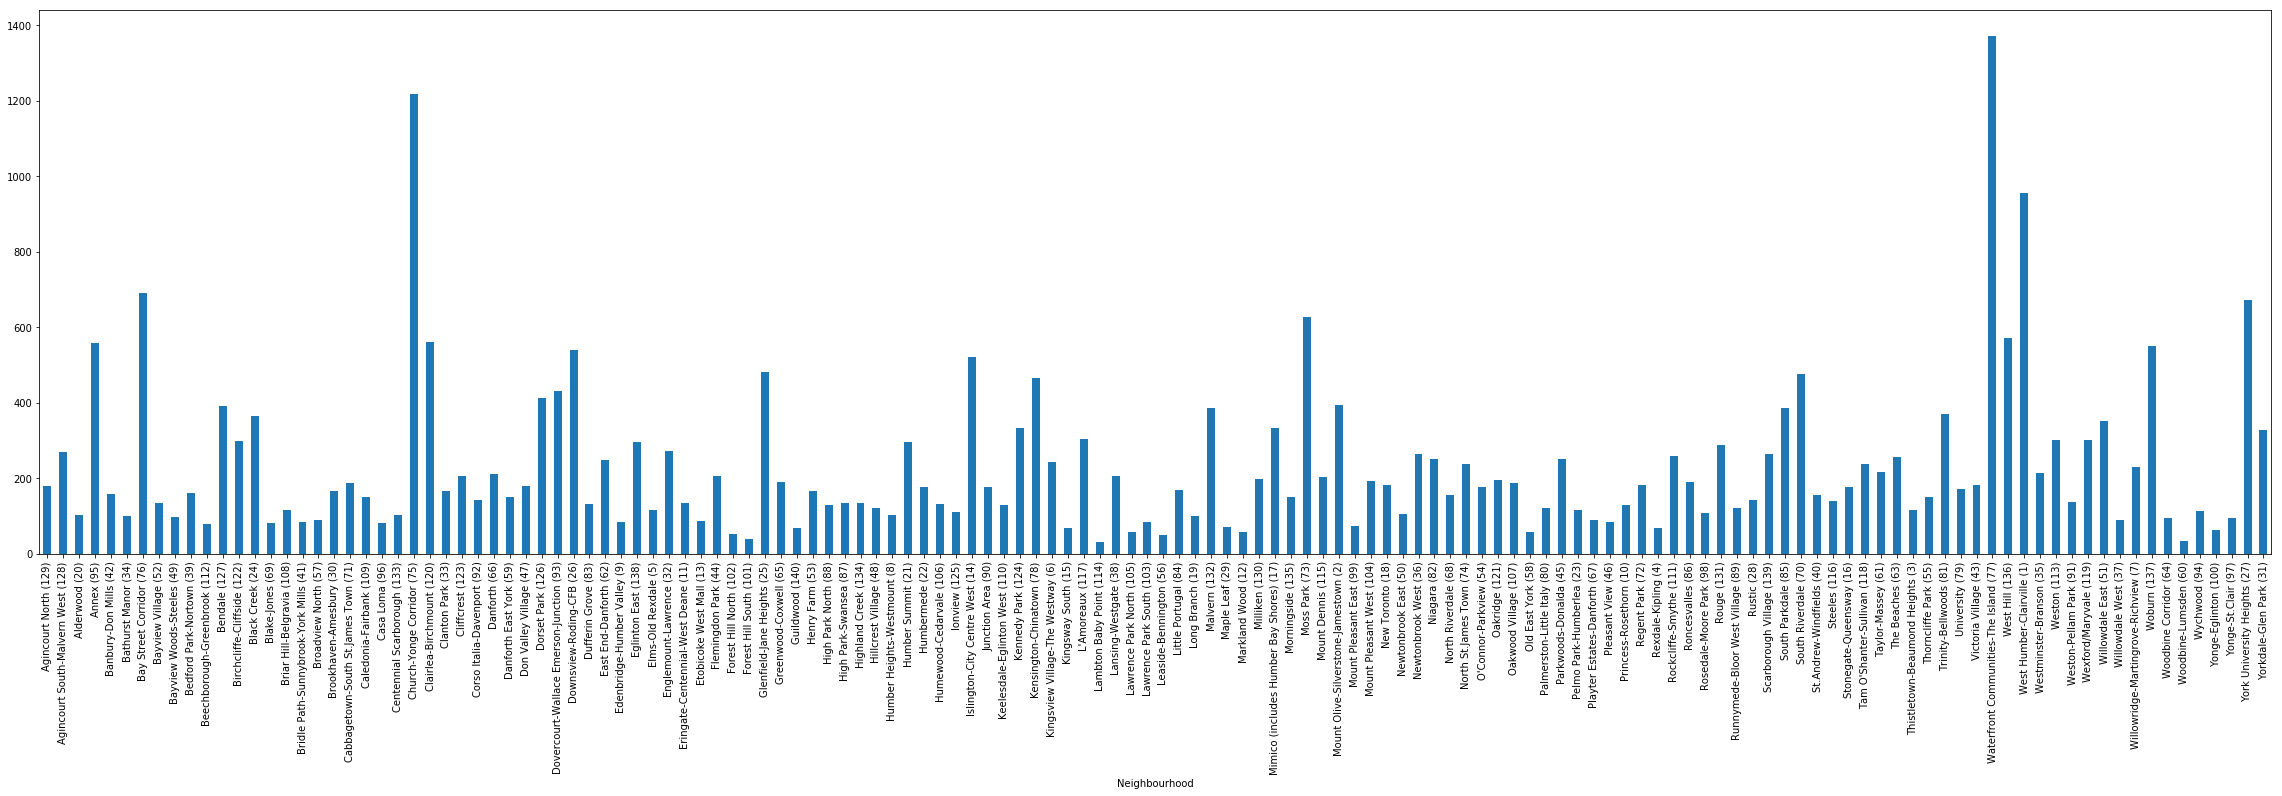

1372

In [117]:
neighboorhood_crimes = year_2016.groupby('Neighbourhood').size()
neighboorhood_crimes.plot(kind='bar', figsize=(40,10))
plt.show()
neighboorhood_crimes.max()

## Most dangerous neighbourhood?

### In which neighbourhood is the maximum of assaults?

In [128]:
assaults_neighbourhood = assaults_only.groupby(['Neighbourhood']).agg('size')
assaults_neighbourhood
#assaults_neighbourhood.plot(kind='bar', figsize=(40,40))
#plt.show()

Neighbourhood
Agincourt North (129)                      84
Agincourt South-Malvern West (128)        143
Alderwood (20)                             39
Annex (95)                                321
Banbury-Don Mills (42)                     76
Bathurst Manor (34)                        45
Bay Street Corridor (76)                  486
Bayview Village (52)                       71
Bayview Woods-Steeles (49)                 41
Bedford Park-Nortown (39)                  31
Beechborough-Greenbrook (112)              49
Bendale (127)                             231
Birchcliffe-Cliffside (122)               187
Black Creek (24)                          248
Blake-Jones (69)                           51
Briar Hill-Belgravia (108)                 49
Bridle Path-Sunnybrook-York Mills (41)     18
Broadview North (57)                       48
Brookhaven-Amesbury (30)                   92
Cabbagetown-South St.James Town (71)      113
Caledonia-Fairbank (109)                   83
Casa Loma (96)      

In [126]:
max_assaults = assaults_neighbourhood.max()


966